# Sprint 7 Project: Instacart EDA

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
    * [1.1 instacart_orders.csv](#ic_orders)
    * [1.2 products.csv](#products)
    * [1.3 order_products.csv](#order_products)
    * [1.4 aisles.csv](#aisles)
    * [1.5 departments.csv](#departments)
    * [1.6 Conclusions](#data_review_conclusions)

* [Stage 2. Data preprocessing](#data_preprocessing)
    * [2.1 instacart_orders.csv](#prepro_ic) 
        * [2.1.1 Correcting types](#ic_type)
        * [2.1.2 Missing values](#ic_missing_values)
        * [2.1.3 Duplicates](#ic_duplicates)
        * [2.1.4 Conclusions](#ic_conclusions)
    * [2.2 products.csv](#prepro_prod)
        * [2.2.1 Correcting types](#prod_type)
        * [2.2.2 Missing values](#prod_missing_values)
        * [2.2.3 Duplicates](#prod_duplicates)
        * [2.2.4 Conclusions](#prod_conclusions)
    * [2.3 order_products.csv](#prepro_op)
        * [2.3.1 Correcting types](#op_type)
        * [2.3.2 Missing values](#op_missing_values)
        * [2.3.3 Duplicates](#op_duplicates)
        * [2.3.4 Conclusions](#op_conclusions)
    * [2.4 aisles.csv](#prepro_aisles)
        * [2.4.1 Correcting types](#aisles_type)
        * [2.4.2 Duplicates](#aisles_duplicates)
        * [2.4.3 Conclusions](#aisles_conclusions)
    * [2.5 departments.csv](#prepro_depart)
        * [2.5.1 Correcting types](#depart_type)
        * [2.5.2 Duplicates](#depart_duplicates)
        * [2.5.3 Conclusions](#depart_conclusions)
    * [2.6 Conclusions](#data_preprocessing_conclusions)

* [Stage 3. Analysis and Visualization](#analysis)
    * [3.1 Easy analysis](#easy_analysis)
        * [3.1.1 Verify the values](#3_1_1)
        * [3.1.2 how many people place orders for each hour of the day?](#3_1_2)
        * [3.1.3 what day of the week people shop for groceries?](#3_1_3)
        * [3.1.4 How long people wait until placing their next order?](#3_1_4)
        * [3.1.5 Conclusions](#easy_conclusions)
    * [3.2 Medium analysis](#medium_analysis)
        * [3.2.1 'order_hour_of_day' distributions on Wednesdays and Saturdays](#3_2_1)
        * [3.2.2 Number of orders per customer](#3_2_2)
        * [3.2.3 What are the top 20 products?](#3_2_3)
        * [3.2.4 Conclusions](#medium_conclusions)
    * [3.3 Hard analysis](#hard_analysis)
        * [3.3.1 How many items do people buy in one order?](#3_3_1)
        * [3.3.2 What are the top 20 items that are reordered most frequently?](#3_3_2)
        * [3.3.3 what proportion of products orders are reorders?](#3_3_3)
        * [3.3.4 proportion of products ordered reorders per customer](#3_3_4)
        * [3.3.5 What are the top 20 items that people put in their carts first?](#3_3_5)
        * [3.3.6 Conclusions](#hard_conclusions)
* [3.4 Conclusions](#analysis_conclusions)

## Introduction <a id=intro></a>

This notebook explores customer shopping behavior on the Instacart grocery delivery platform. Working with multiple data tables representing orders, products, and customer information, I'll analyze how customers interact with this grocery delivery service. The goal is to uncover meaningful patterns that could provide business insights and improve the customer experience.
The analysis will follow a structured approach: first setting up and exploring the raw data files, then cleaning and preparing the data for analysis, and finally addressing specific stakeholder questions about shopping habits. The findings will help Instacart make more informed business decisions based on actual customer behavior.

In [1]:
import pandas as pd
import numpy as np
import calendar as cal
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Data overview <a id=data_review></a>



### 1.1 instacart_orders.csv <a id=ic_orders></a>

In [2]:
ic_orders = pd.read_csv('instacart_orders.csv')
ic_orders.head()

,order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0,1515936;183418;11;6;13;30.0
1,1690866;163593;5;5;12;9.0
2,1454967;39980;4;5;19;2.0
3,1768857;82516;56;0;20;10.0
4,3007858;196724;2;4;12;17.0


'instacart_orders.csv' uses semi-colons as separators in the file. The pd.read_csv() command should be adjusted.

In [3]:
ic_orders = pd.read_csv('instacart_orders.csv', sep=';')
ic_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
ic_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Because all the columns contain digits, pandas read them as ints and a float. In data processing I'll change types (and elaborate on why). <br>
Need to check why 'days_since_prior_order' has ~6% null values and if they are consistent.

[Back to contents](#back)

### 1.2 products.csv <a id=products></a>

In [5]:
products = pd.read_csv('products.csv')
products.head()

,product_id;product_name;aisle_id;department_id
0,1;Chocolate Sandwich Cookies;61;19
1,2;All-Seasons Salt;104;13
2,3;Robust Golden Unsweetened Oolong Tea;94;7
3,4;Smart Ones Classic Favorites Mini Rigatoni W...
4,5;Green Chile Anytime Sauce;5;13


'products.csv' is also separated by semi-colons.

In [6]:
products = pd.read_csv('products.csv', sep=';')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Int columns should be re-cast as different types.<br>
'product_name' has 3% missing values, but these rows might be beneficial for aisle or department calculations. I will keep them for now.<br>
The Index is redundant in this table. 'product_id' should be index

[Back to contents](#back)

### 1.3 order_products.csv <a id=order_products></a>

In [8]:
order_products = pd.read_csv('order_products.csv')
order_products.head()

,order_id;product_id;add_to_cart_order;reordered
0,2141543;11440;17.0;0
1,567889;1560;1.0;1
2,2261212;26683;1.0;1
3,491251;8670;35.0;1
4,2571142;1940;5.0;1


'order_products.csv' separated with semi-colons.

In [9]:
order_products = pd.read_csv('order_products.csv', sep=';')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [10]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


'order_products.csv' has very little missing values in the 'add_to_cart_order'. probably orders of only one items, or first items. <br> 
Types should be re-cast to protect the data from wrong manipulation. 

[Back to contents](#back)

### 1.4 aisles.csv <a id=aisles></a>

In [11]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id;aisle
0,1;prepared soups salads
1,2;specialty cheeses
2,3;energy granola bars
3,4;instant foods
4,5;marinades meat preparation


'aisles.csv' separated with semi-colons.

In [12]:
aisles = pd.read_csv('aisles.csv', sep=';')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


'aisles.csv' contains no missing values. aisle_id should be re-cast.
Having an index on this dataframe is redundant. 

[Back to contents](#back)

### 1.5 departments.csv <a id=departments></a>

In [14]:
departments = pd.read_csv('departments.csv')
departments.head()

,department_id;department
0,1;frozen
1,2;other
2,3;bakery
3,4;produce
4,5;alcohol


'departments.csv', like all the other tables, is separated by semi-colons.

In [15]:
departments = pd.read_csv('departments.csv', sep=';')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


Like in 'aisles.csv', 'departments.csv' contains no nulls, and have a redundant automatic index.

[Back to contents](#back)

### 1.6 conclusions <a id=#data_review_conclusions></a>

All the tables of this project were formatted using semi-colons. This should be mentioned in the enrolling documentation so to spare us doing all the reading twice.<br>
All the tables contain ID-columns and categories that should be re-casted to protect the data from wrong manipulations. <br>
'instacart_oreders.csv' and 'order_products.csv' have easy-to-explain nulls that should be verified. 'products.csv' has missing values in the 'product_name' column. Need to report that to the DB administer. Decision about dropping the rows with missing product names will depend on the analysis requested by the stakeholders. 

[Back to contents](#back)

## Stage 2: Data processing <a id=data_processing></a>

### 2.1 instacart_orders.csv <a id=prepro_ic></a>

#### 2.1.1 Correcting types <a id=ic_type></a>

In [17]:
# re-casting 'order_id', 'user_id', 'order_number' as objects:
ic_orders['order_id'] = ic_orders['order_id'].astype('object')
ic_orders['user_id'] = ic_orders['user_id'].astype('object')
ic_orders['order_number'] = ic_orders['order_number'].astype('object')

In [18]:
# translating 'order_dow' numeric values to names:
def name_day(i):
    return cal.day_name[i]

ic_orders['order_dow'] = ic_orders['order_dow'].apply(name_day)

In [19]:
# re-casting 'order_dow' and 'order_hour_of_day' as categorical:
ic_orders['order_dow'] = ic_orders['order_dow'].astype('category')
ic_orders['order_hour_of_day'] = ic_orders['order_hour_of_day'].astype('category')

In [20]:
# checking if 'days_since_prior_order' can be turned to int:
print(ic_orders['days_since_prior_order'].sample(10))
np.array_equal(ic_orders['days_since_prior_order'].dropna(), ic_orders['days_since_prior_order'].dropna().astype('int'))

116079     9.0
286985     5.0
277974     2.0
235768     5.0
268026     2.0
44799      6.0
40841     29.0
464387     NaN
412739    22.0
138928    16.0
Name: days_since_prior_order, dtype: float64


True

In [21]:
ic_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   order_id                478967 non-null  object  
 1   user_id                 478967 non-null  object  
 2   order_number            478967 non-null  object  
 3   order_dow               478967 non-null  category
 4   order_hour_of_day       478967 non-null  category
 5   days_since_prior_order  450148 non-null  float64 
dtypes: category(2), float64(1), object(3)
memory usage: 15.5+ MB


Because 'order_id', 'user_id' and 'order_number' represent ID numbers and not real numbers, I changed their type to 'object' to prevent irrelevant calculations being performed on them. <br>
Because 'order_dow' and 'order_hour_of_day' represent a part of a timestamp (not given), I changed their type to 'category' to enable referencing them as categorical values, but to prevent arithmetical calculations. After consulting, I used calendar.day_name to translate the numeric values to day names. <br>
'days_since_prior_order' should be examined after dealing with missing values. if the missing values can be replaced with '0', column can be changed to 'int' type. no data is lost in the conversion.  

[Back to contents](#back)

#### 2.1.2 Missing values <a id=ic_missing_values></a>

In [22]:
ic_missing_rows = ic_orders[ic_orders['days_since_prior_order'].isna()]
ic_missing_rows.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,Thursday,10,NaN
96,787445,25685,1,Sunday,18,NaN
100,294410,111449,1,Monday,19,NaN
103,2869915,123958,1,Friday,16,NaN
104,2521921,42286,1,Thursday,18,NaN


In [23]:
# checking if all the missing rows are first orders:
print(ic_orders['order_number'].value_counts())
print()
print(ic_missing_rows['order_number'].value_counts())
print()
first_order = ic_missing_rows[ic_missing_rows['order_number']==1]
if ic_missing_rows.size == first_order.size:
    print('The tables are identical')
else:
    print('tables are not identical')

order_number
1      28819
4      28704
3      28686
2      28633
5      25661
       ...  
97       221
96       220
100      194
98       191
99       169
Name: count, Length: 100, dtype: int64

order_number
1    28819
Name: count, dtype: int64

The tables are identical


In [24]:
# replacing 'days_since_prior_order' nulls with 0 and re-casting the column as 'int64'
ic_orders['days_since_prior_order'] = ic_orders['days_since_prior_order'].fillna(0).astype('int64')
ic_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   order_id                478967 non-null  object  
 1   user_id                 478967 non-null  object  
 2   order_number            478967 non-null  object  
 3   order_dow               478967 non-null  category
 4   order_hour_of_day       478967 non-null  category
 5   days_since_prior_order  478967 non-null  int64   
dtypes: category(2), int64(1), object(3)
memory usage: 15.5+ MB


since all the nulls in the column are associated with first orders of the users, I replaced the NaN's with 0, and cast the column as 'int' because there is no record of parts of day or information in floats. 

[Back to contents](#back)

#### 2.1.3 Duplicates <a id=ic_duplicates></a>

In [25]:
# checking for obvious duplicates:
ic_orders.duplicated().value_counts()

False    478952
True         15
Name: count, dtype: int64

In [26]:
ic_orders = ic_orders.drop_duplicates(ignore_index=True)
ic_orders.duplicated().value_counts()

False    478952
Name: count, dtype: int64

I checked and cleaned 15 obvious duplicates from the dataframe. <br>
This dataframe contains no columns that are prone to different spellings or obvious typos, and so there is no use in searching for implicit duplicates.

[Back to contents](#back)

#### 2.1.4 Conclusions <a id=ic_conclusions></a>

Columns representing ID's were changed to 'object' dtype to prevent irrelevant calculations being performed on them. <br>
'order_dow' changed from numeric to names. 'order_dow' and 'order_hour_of_day' changed dtype to 'category' to enable referencing them as categorical values, but to prevent arithmetical calculations. <br> 
In 'days_since_prior_order' all NaN's replaced with 0. Column was cast as 'int' because there is no record of parts of day or information in floats. <br> 
Obvious duplicates were dropped from the dataframe. <br>
This dataframe contains no columns that are prone to different spellings or obvious typos so I did'nt search for implicit duplicates.

[Back to contents](#back)

### 2.2 products.csv <a id=prepro_prod></a>

#### 2.2.1 Correcting types <a id=prod_type></a>

In [27]:
# re-casting 'product_id' as 'object':
products['product_id'] = products['product_id'].astype('object')

In [28]:
# re casting 'aisle_id' and 'department_id' as 'category':
products['aisle_id'] = products['aisle_id'].astype('category')
products['department_id'] = products['department_id'].astype('category')

In [29]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   product_id     49694 non-null  object  
 1   product_name   48436 non-null  object  
 2   aisle_id       49694 non-null  category
 3   department_id  49694 non-null  category
dtypes: category(2), object(2)
memory usage: 928.0+ KB


'product_id' represents ID numbers. I re-cast the column as 'object' to prevent calculations with the data and set it as index. <br>
'aisle_id' and 'department_id' were changed to 'category' to facilitate needed manipulations.

[Back to contents](#back)

#### 2.2.2 Missing values <a id=prod_missing_values></a>

In [30]:
prod_missing_rows = products[products['product_name'].isna()]
print(prod_missing_rows.sample(10, random_state=123))
print()
check1 = prod_missing_rows[(prod_missing_rows['aisle_id']!=100)]
check1.info()

      product_id product_name aisle_id department_id
35281      35282          NaN      100            21
14590      14591          NaN      100            21
35483      35484          NaN      100            21
21181      21182          NaN      100            21
44363      44364          NaN      100            21
43506      43507          NaN      100            21
47322      47323          NaN      100            21
10947      10948          NaN      100            21
25657      25658          NaN      100            21
17495      17496          NaN      100            21

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   product_id     0 non-null      object  
 1   product_name   0 non-null      object  
 2   aisle_id       0 non-null      category
 3   department_id  0 non-null      category
dtypes: category(2), object(2)
memory usage: 5.8+ KB


In [31]:
print(aisles[aisles['aisle_id']==100])
print()
print(departments[departments['department_id']==21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [32]:
check2 = prod_missing_rows.query("product_id in @products.product_id")
print(check2.info())
print()
print(check2.describe())
print()
check2.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 37 to 49668
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   product_id     1258 non-null   object  
 1   product_name   0 non-null      object  
 2   aisle_id       1258 non-null   category
 3   department_id  1258 non-null   category
dtypes: category(2), object(2)
memory usage: 39.0+ KB
None

        product_id product_name  aisle_id  department_id
count         1258            0      1258           1258
unique        1258            0         1              1
top             38          NaN       100             21
freq             1          NaN      1258           1258



,product_id,product_name,aisle_id,department_id
40795,40796,NaN,100,21
4649,4650,NaN,100,21
40716,40717,NaN,100,21
33640,33641,NaN,100,21
25401,25402,NaN,100,21
32553,32554,NaN,100,21
45513,45514,NaN,100,21
38498,38499,NaN,100,21
25662,25663,NaN,100,21
47997,47998,NaN,100,21


In [33]:
products = products.dropna()
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48436 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   product_id     48436 non-null  object  
 1   product_name   48436 non-null  object  
 2   aisle_id       48436 non-null  category
 3   department_id  48436 non-null  category
dtypes: category(2), object(2)
memory usage: 1.3+ MB


Upon checking the rows with missing product names: their ID's only show up once in the dataframe, have NaN for 'product_name', and all assigned 'aisle_id' 100 and 'department_id' 21, both named "missing". I cannot reconstruct what these products are or where do they belong, and so can be dropped from the dataframe. <br>
These items could be discontinued products that are left blank to not interrupt the 'product_id' columns. <br>
because of the dropped rows, i will not re-assign the 'product_id' column as index, for it is not consecutive any more.

[Back to contents](#back)

#### 2.2.3 Duplicates <a id=prod_duplicates></a>

In [34]:
# checking for obvious duplicates:
print(products.duplicated().value_counts())
products['product_id'].nunique()

False    48436
Name: count, dtype: int64


48436

The dataframe has no obvious duplicates. After checking that all 'product_id' values are unique values, I fear no implicit duplicates as it is un-logical to have the same exact item listed under 2 ID's. 

[Back to contents](#back)

#### 2.2.4 Conclusions <a id=prod_coclusions></a>

'product_id' re-cast the column as 'object' to prevent calculations. <br>
'aisle_id' and 'department_id' were changed to 'category' to facilitate manipulations.
Rows with missing product names: their ID's only show up once in the dataframe and all assigned 'aisle_id' 100 and 'department_id' 21, both named "missing". I cannot reconstruct what these products are or where do they belong, and were dropped from the dataframe. <br>
because of the dropped rows, i will not re-assign the 'product_id' column as index, for it is not consecutive any more.
The dataframe has no obvious duplicates. I fear no implicit duplicates as it is un-logical to have the same exact item listed under 2 ID's. 

[Back to contents](#back)

### 2.3 Order_products.csv <a id=prepro_op></a>

#### 2.3.1 Correcting types <a id=op_type></a>

In [35]:
# re-casting 'order_id' and 'product_id' as 'object':
order_products['order_id'] = order_products['order_id'].astype('object')
order_products['product_id'] = order_products['product_id'].astype('object')

In [36]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           object 
 1   product_id         object 
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 138.7+ MB


Because 'order_id' and 'product_id' are both ID numbers, I changed them to 'object' types to prevent calculations with their values. <br>
'add_to_cart_order' should be turned to int, as you cant partly add something to the cart. I cant do that at this stage because I still need to verify the missing values in the column. After I'll complete the handling of missing values, ill also correct its type.<br>
Because 'reordered' uses binary to represent True/False, I will keep it as INT type to facilitate statistical calculations.

[Back to contents](#back)

#### 2.3.2 Missing values <a id=op_missing_values></a>

In [37]:
# checking if the missing values of 'add_to_cart_order' are all first items or single purchase order:
op_missing_rows = order_products[order_products['add_to_cart_order'].isna()]
print(op_missing_rows.info())
print(op_missing_rows.sample(15))

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 737 to 4535739
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           836 non-null    object 
 1   product_id         836 non-null    object 
 2   add_to_cart_order  0 non-null      float64
 3   reordered          836 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.7+ KB
None
        order_id product_id  add_to_cart_order  reordered
2781179  2136777      34993                NaN          1
410035   1959075      43182                NaN          1
1388246  1730767      39561                NaN          1
430918   1648217      48946                NaN          1
3070436   871281      20119                NaN          0
144645   2997021      29418                NaN          0
1458986  1800005      46346                NaN          0
2743329   171934      26032                NaN          1
3719634  1386261 

In [38]:
orders_with_misses = order_products[order_products['order_id'].isin(op_missing_rows['order_id'])]
orders_with_misses = orders_with_misses.groupby('order_id').count()
orders_with_misses.head(15)

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
61355,127,64,127
102236,95,64,95
129627,69,64,69
165801,70,64,70
171934,104,64,104
180546,66,64,66
264710,91,64,91
293169,77,64,77


The orders with NaN 'add_to_cart_order' values are not single item purchase. Ill look at 2 purchases from this table to try and understand if it is a specific condition, or a random problem to be reported to the DB admin.

In [39]:
order_9310 = order_products[order_products['order_id']==9310]
print(order_9310.sort_values(by='add_to_cart_order'))
print(order_9310['add_to_cart_order'].info())

        order_id product_id  add_to_cart_order  reordered
4520124     9310      32578                1.0          1
2160215     9310      20082                2.0          1
3148360     9310      27966                3.0          1
1806792     9310      18523                4.0          1
990652      9310      42828                5.0          0
...          ...        ...                ...        ...
854075      9310      33290               61.0          0
3468473     9310      15455               62.0          0
1992474     9310      45002               63.0          0
4432234     9310      21332               64.0          0
2437093     9310      25753                NaN          0

[65 rows x 4 columns]
<class 'pandas.core.series.Series'>
Index: 65 entries, 4350 to 4520124
Series name: add_to_cart_order
Non-Null Count  Dtype  
--------------  -----  
64 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB
None


In [40]:
order_61355 = order_products[order_products['order_id']==61355]
print(order_61355.sort_values(by='add_to_cart_order'))
print(order_61355['add_to_cart_order'].info())

        order_id product_id  add_to_cart_order  reordered
2897193    61355      47209                1.0          0
2652936    61355      34270                2.0          1
2187266    61355      41363                3.0          0
1628680    61355      28420                4.0          1
269840     61355      14233                5.0          0
...          ...        ...                ...        ...
4026844    61355      48104                NaN          0
4063159    61355       1087                NaN          0
4126014    61355      12440                NaN          0
4164200    61355       9484                NaN          0
4268097    61355      40709                NaN          0

[127 rows x 4 columns]
<class 'pandas.core.series.Series'>
Index: 127 entries, 57981 to 4525165
Series name: add_to_cart_order
Non-Null Count  Dtype  
--------------  -----  
64 non-null     float64
dtypes: float64(1)
memory usage: 2.0 KB
None


It seems the system can only record the order numbers untill 64, and afterwards it assigns only NaN. Looking back at the table created by "orders_with_misses.groupby('order_id').count()", we see all orders have 64 counts on the 'add_to_cart_order' column regardless of the order size. I will do one last check to confirm that all orders on that table are bigger than 64 items.

In [41]:
orders_with_misses['product_id'].describe()

count     70.000000
mean      75.942857
std       12.898585
min       65.000000
25%       67.000000
50%       71.000000
75%       78.000000
max      127.000000
Name: product_id, dtype: float64

The smallest order on the check-table is/are with 65 items. it seems the NaN occur because the DB stoped counting after 64. Should be reported to the D.Es<br>

Because I cannot re-construct the missing order but want to keep the data for other analysis, I will keep the rows in the dataframe. I will however limit statistical analyses on the 'add_to_cart_order' to orders containing 64 items max. trying to fill-in the missing values will abscure the results.

[Back to contents](#back)

#### 2.3.3 Duplicates <a id=op_duplicates></a>

In [42]:
# checking for obvious duplicates:
order_products.duplicated().value_counts()

False    4545007
Name: count, dtype: int64

The dataframe shows no obvious duplicates. Based on the information stored in the columns I dont suspect typos or other implicit duplicates. 

[Back to contents](#back)

#### 2.3.4 Conclusions <a id=oc_conclusions></a>

'order_id' and 'product_id' changed to 'object' types to prevent calculations with thier values. <br>
The missing values on the 'add_to_cart_order' column stem from an error in the collection phase. The system registered the order till item 64, and afterwards assigned NaN values. The order of the missing items cant be reconstructed, so it can't be filled-in. I fear changing other statistical results if rows with NaN values taken out. I decided on keeping the rows in the dataframe, but remembering excluding these orders in caculations for item's purchase order.<br>
The dataframe shows no obvious duplicates and I dont suspect finding typos or other implicit duplicates. 

[Back to contents](#back)

### 2.4 Aisles.csv <a id=prepro_aisles></a>

#### 2.4.1 Correcting types <a id=asiles_type></a>

In [43]:
# re-casting 'aisle_id' as object, and setting it as index:
aisles['aisle_id'] = aisles['aisle_id'].astype('object')
aisles = aisles.set_index('aisle_id')

aisles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 1 to 134
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aisle   134 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


'aisle_id' was set to 'object' to prevent statistical calculations with the column, and set as index for conviniece.

[Back to contents](#back)

#### 2.4.2 Duplicates <a id=aisles_duplicates></a>

In [44]:
# checking obvious duplicates:
aisles.duplicated().value_counts()

False    134
Name: count, dtype: int64

In [45]:
# searching for implicit duplicates:
print(aisles['aisle'].nunique())
print()
print(aisles['aisle'].value_counts().tail(10))

134

aisle
candy chocolate               1
eye ear care                  1
buns rolls                    1
frozen vegan vegetarian       1
cat food care                 1
dog food care                 1
seafood counter               1
frozen meals                  1
ice cream ice                 1
specialty wines champagnes    1
Name: count, dtype: int64


There are no Obvious duplicates in the dataframe. All the rows in the dataframe have unique 'aisle' value. I found no duplicates.

[Back to contents](#back)

#### 2.4.3 Conclusions <a id=aisles_conclusions></a>

'aisle_id' was set to 'object' and set as index for conviniece.<br>
The dataframe has no duplicates

[Back to contents](#back)

### 2.5 Departments.csv <a id=prepro_depart></a>

#### 2.5.1 Correcting types <a id=depart_type></a>

In [46]:
# re-casting 'department_id' as 'object' and setting it as index:
departments['department_id'] = departments['department_id'].astype('object')
departments = departments.set_index('department_id')

departments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 21
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  21 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


'department_id' was set to 'object' to prevent statistical calculations with the column, and set as index for conviniece.

[Back to contents](#back)

#### 2.5.2 Duplicates <a id=depart_duplicates></a>

In [47]:
# checking for obvious duplicates:
departments.duplicated().value_counts()

False    21
Name: count, dtype: int64

In [48]:
# searching for implicit duplicates:
print(departments['department'].nunique())
print()
print(departments['department'].value_counts().tail(10))

21

department
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: count, dtype: int64


There are no Obvious duplicates in the dataframe. All the rows in the dataframe have unique 'department' value. I found no duplicates.

[Back to contents](#back)

#### 2.5.3 Conclusions <a id=depart_conclusions></a>

'department_id' was set to 'object' and set as index for conviniece.<br>
The dataframe has no duplicates.

[Back to contents](#back)

## 

## Stage 3. Analysis and Visualizations <a id=analysis></a>

### 3.1 Easy analysis <a id=easy_analysis></a>

#### 3.1.1 Verify that values <a id=3_1_1></a>

Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).

In [49]:
# Checking the values of the desired columns:
print(ic_orders['order_dow'].value_counts().sort_index())
print()
ic_orders['order_hour_of_day'].value_counts().sort_index()

order_dow
Friday       59810
Monday       84090
Saturday     63488
Sunday       62649
Thursday     60897
Tuesday      82185
Wednesday    65833
Name: count, dtype: int64



order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

Both columns have the expected sane values, described in the documentation.  

[Back to conetents](#back)

#### 3.1.2  how many people place orders for each hour of the day <a id=3_1_2></a>

Create a plot that shows how many people place orders for each hour of the day.

In [50]:
# counting unique users in each hour:
user_per_hour = ic_orders.groupby('order_hour_of_day', observed=False)['user_id'].nunique().reset_index()
user_per_hour.columns = ['order_hour_of_day', 'unique_user_count']
user_per_hour = user_per_hour.set_index('order_hour_of_day')
user_per_hour

,unique_user_count
order_hour_of_day,
0,2991
1,1671
2,958
3,744
4,735
5,1281
6,3757
7,10993
8,20268


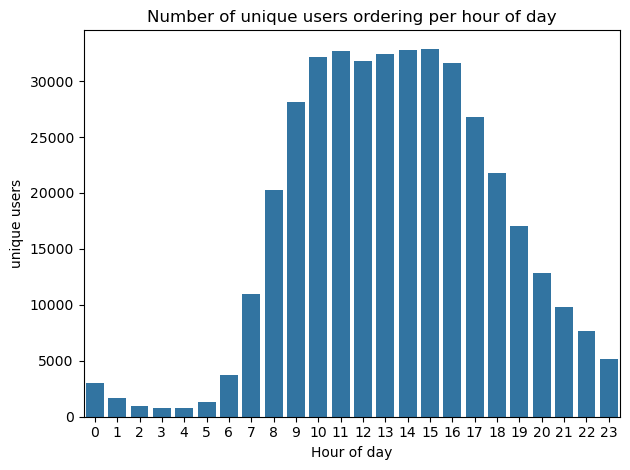

In [51]:
# plotting:
sns.barplot(
    data=user_per_hour,
    x='order_hour_of_day',
    y='unique_user_count',
)

plt.title('Number of unique users ordering per hour of day')
plt.xlabel('Hour of day')
plt.ylabel('unique users')
plt.tight_layout()
plt.show()

Most active hours, with the most unique users placing orders are between 10h and 16h.

[Back to contents](#back)

#### 3.1.3 what day of the week people shop for groceries? <a id=3_1_3></a>

Create a plot that shows what day of the week people shop for groceries.

In [52]:
# counting orders grouped by 'order_dow':
orders_per_dow = ic_orders.groupby('order_dow', observed=False)['order_id'].nunique().reset_index()
orders_per_dow.columns = ['order_dow', 'number_of_orders']
orders_per_dow = orders_per_dow.set_index('order_dow')
orders_per_dow

,number_of_orders
order_dow,
Friday,59810
Monday,84090
Saturday,63488
Sunday,62649
Thursday,60897
Tuesday,82185
Wednesday,65833


In [53]:
# re-ordering the index:
orders_per_dow = orders_per_dow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
orders_per_dow

,number_of_orders
order_dow,
Monday,84090
Tuesday,82185
Wednesday,65833
Thursday,60897
Friday,59810
Saturday,63488
Sunday,62649


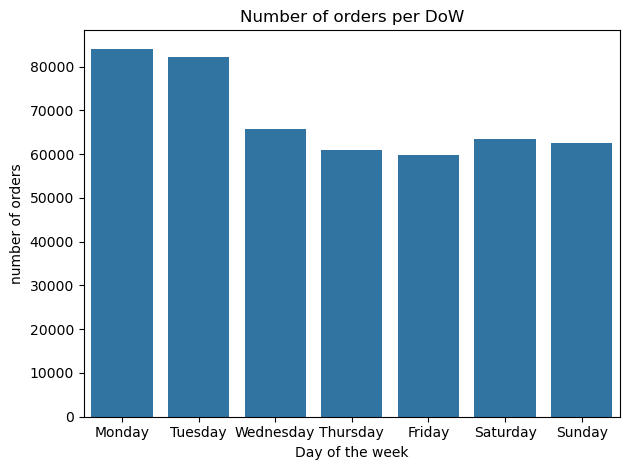

In [54]:
# creating a bar-plot visualization:
sns.barplot(
    data=orders_per_dow,
    x='order_dow',
    y='number_of_orders'
)

plt.title('Number of orders per DoW')
plt.xlabel('Day of the week')
plt.ylabel('number of orders')
plt.tight_layout()
plt.show()

The most busy days on Instacart are Monday and Tuesday.

[Back to contents](#back)

#### 3.1.4 How long people wait until placing their next order? <a id=3_1_4></a>

Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.

In [55]:
# checking min value of ic_orders['order_number']:
ic_orders['order_number'].min()

1

In [56]:
# creating a list of users who made more than one purchase:
returning_users = ic_orders[ic_orders['order_number']>1]['user_id']
returning_users = returning_users.drop_duplicates()
returning_users.info()

<class 'pandas.core.series.Series'>
Index: 149597 entries, 0 to 478946
Series name: user_id
Non-Null Count   Dtype 
--------------   ----- 
149597 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [57]:
# making a dataframe of returning users, excluding their first order (because it will yield 'days_since_prior_order' == 0):
returning_data = ic_orders.query(('user_id in @returning_users') and ('order_number > 1'))
returning_data['days_since_prior_order'].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

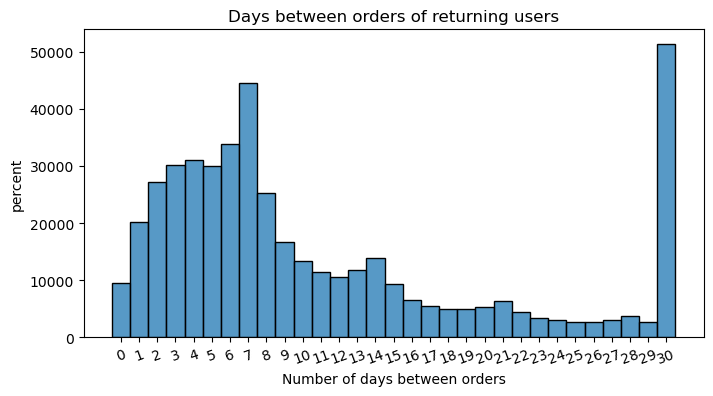

In [58]:
# plotting a histogram of the 'days_since_prior_order' column:
plt.figure(figsize=(8,4))

sns.histplot(
    data=returning_data,
    x='days_since_prior_order',
    stat='count',
    discrete=True
)

plt.title('Days between orders of returning users')
plt.xlabel('Number of days between orders')
plt.xticks(range(0,31), rotation=20)
plt.ylabel('percent')
plt.show()

most people wait 30 days between orders, meaning they most likely make their large bulk purchase with instacart. This is also the longest it takes returning users to make another purchase. <br>
second most common waiting period is 7 days, most likely a weekly bulk purchase. <br>
Interesting to see there is a significant amount of users making 2 purchases on the same day. Can be that they forgot to order something. 

[Back to contents](#back)

#### 3.1.5 Conclusions <a id=easy_conclusions></a>

Both 'order_dow' and 'order_hour_of_day' from 'instacart_orders.csv' have sane values as described in the documentation.<br>
Most active hours, with the most unique users placing orders are between 10h and 16h.<br>
The most busy days on Instacart are Mondays and Tuesdays.<br>
2 most common waiting periods between purchases of returning costumers are 30 and 7 days, logical cycles for regular bulk purchases. There is an interesting and significant amount of users ordering more than one order a day. Should be looked into what can explain these purchases, maybe instacart can offer a new service. 

[Back to contents](#back)

#### 3.2.1 'order_hour_of_day' distributions on Wednesdays and Saturdays <a id=3_2_1>

Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days on the same plot and describe the differences that you see.

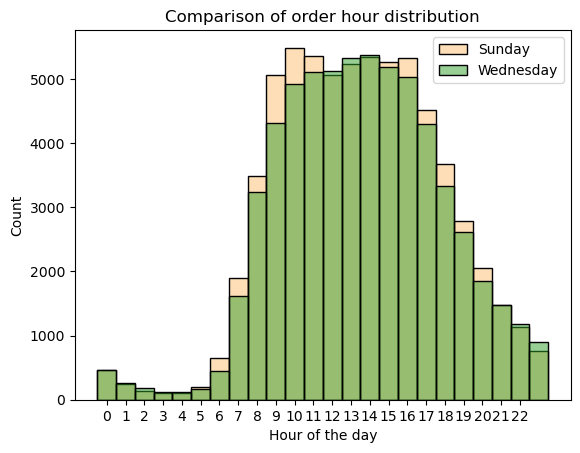

In [59]:
# creating a helper dataframe of Wednesdays and Saturdays:
sun_wed_df = ic_orders[(ic_orders['order_dow']=='Sunday')|(ic_orders['order_dow']=='Wednesday')]

# plotting the requested visualization:
sns.histplot(
    data=sun_wed_df,
    x='order_hour_of_day',
    hue='order_dow',
    palette='Paired',
    discrete=True,
    legend=True
)
plt.title('Comparison of order hour distribution')
plt.xlabel('Hour of the day')
plt.xticks(range(0, 23))
plt.ylabel('Count')
plt.legend(
    labels=['Sunday', 'Wednesday'],
    loc='upper right'
)
plt.show()

It looks that there is not much difference in the distribution between Sunday and Wednesday on Instacart. Wednesday has slightly more sales (as shown [HERE](#3_1_3)), and they condense more to working hours. But the trends are similar. 

[Back to contents](#back)

#### 3.2.2 Number of orders per customer <a id=3_2_2></a>

Plot the distribution for the number of orders that customers place (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)

In [60]:
# creating the helper dataframe, recording the max values of 'order number' per customer:
user_order_num = ic_orders.pivot_table(
    values='order_number',
    index='user_id',
    aggfunc='max')

user_order_num.columns = ['number_of_orders']
user_order_num

,number_of_orders
user_id,
2,4
4,6
5,4
6,4
7,19
...,...
206203,2
206206,66
206207,14


In [61]:
# checking that the number of user IDs makes sense and I didn't lose data:
print(user_order_num.count())
print(ic_orders['user_id'].nunique())

number_of_orders    157437
dtype: int64
157437


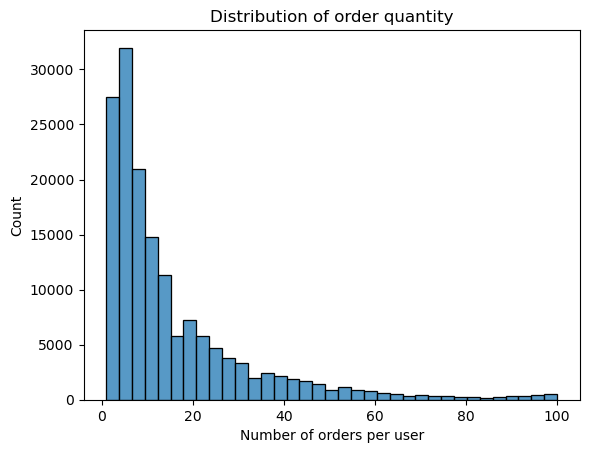

In [62]:
# plotting:
sns.histplot(
    data=user_order_num,
    x='number_of_orders',
    bins=35
)
plt.title('Distribution of order quantity')
plt.xlabel('Number of orders per user')
plt.ylabel('Count')
plt.show()

Most of the users have made less than 10 orders. 

[Back to contents](#back)

#### 3.2.3 What are the top 20 products? <a id=3_2_3></a>

What are the top 20 products that are ordered most frequently (display their id and name)?

In [63]:
# joining the order_products.csv and products.csv to find the top 20 items:
merged_op_prod = order_products.merge(products, how='left', on='product_id')
merged_op_prod.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1.0,1,Bag Of Ice,37,1
2,2261212,26683,1.0,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35.0,1,Diced Tomatoes,81,15
4,2571142,1940,5.0,1,Organic 2% Reduced Fat Milk,84,16


In [64]:
# selecting top 20 most frequently ordered:
top_20_list = merged_op_prod.groupby(['product_id', 'product_name']).agg(orders_count=('order_id', 'count')).reset_index()
top_20_list.sort_values(by='orders_count', ascending=False, inplace=True)
top_20_list[['product_id', 'product_name']].head(20)

,product_id,product_name
22332,24852,Banana
11772,13176,Bag of Organic Bananas
18970,21137,Organic Strawberries
19660,21903,Organic Baby Spinach
42362,47209,Organic Hass Avocado
42863,47766,Organic Avocado
42739,47626,Large Lemon
15037,16797,Strawberries
23546,26209,Limes
25022,27845,Organic Whole Milk


All the items in the top 20 products list are fresh produce - fruits and vegetables.

[Back to contents](#back)

#### 3.2.4 Conclusion <a id=medium_conclusions></a>

Distribution of orders over the hours of the day on Sundays and Wednesdays is quite similar.<br>
Most of the users have made less than 10 orders. <br>
All the items in the top 20 products list are fresh produce - fruits and vegetables.

[Back to contents](#back)

### 3.3 Hard analysis <a id=hard_analysis></a>

#### 3.3.1 How many items do people buy in one order? <a id=3_3_1></a>

How many items do people typically buy in one order? What does the distribution look like?

In [99]:
# counting number of products associated with one order_id in 'order_products.csv':
items_per_order = order_products.groupby('order_id')['product_id'].count().reset_index()
items_per_order.columns = ['order_id', 'number_of_items']
items_per_order['number_of_items'].describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: number_of_items, dtype: float64

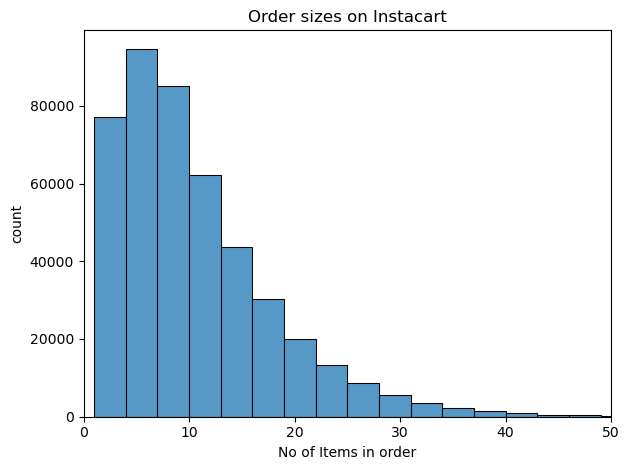

In [98]:
# plotting
sns.histplot(data=items_per_order, 
             x='number_of_items', 
             binwidth=3, 
)

plt.title('Order sizes on Instacart')
plt.xlabel('No of Items in order')
plt.xlim(0,50)
plt.ylabel('count')
plt.tight_layout()
plt.show()

The average order size is 10 items, but that is skewed by some of the larger orders in our data. The median order is 8.<br>
75% of all orders contain up to 14 items. Orders above 40 items exist, but are a very small percent of all orders. 

[Back to contents](#back)

#### 3.3.2 What are the top 20 items that are reordered most frequently? <a id=3_3_2></a>

What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [102]:
# I will use the existing 'merged_op_prod' DF to collect and count re-ordered items:
re_orders = merged_op_prod[merged_op_prod['reordered']==1]
count_reorders = re_orders.groupby(['product_id', 'product_name']).agg(times_reordered=('reordered', 'sum'))
count_reorders.sort_values(by='times_reordered', inplace=True, ascending=False)
count_reorders.head(20)

,,times_reordered
product_id,product_name,
24852,Banana,55763
13176,Bag of Organic Bananas,44450
21137,Organic Strawberries,28639
21903,Organic Baby Spinach,26233
47209,Organic Hass Avocado,23629
47766,Organic Avocado,18743
27845,Organic Whole Milk,16251
47626,Large Lemon,15044
27966,Organic Raspberries,14748


Above is the to 20 re-ordered items. Similar to the top 20 purchased items, all the items here are fresh produce, although not all top sellers are top re-orders. Lists are not identical in contents, and not all items share the same place on both lists even if present in both. 

[Back to contents](#back)

#### 3.3.3 what proportion of products orders are reorders? <a id=3_3_3></a>

For each product, what proportion of its orders are reorders (create a table with columns for the product ID, product name, and reorder proportion)?

In [117]:
# I work with the already created 'merged_op_prod':

re_order_proportion = merged_op_prod.groupby(['product_id', 'product_name']).agg(
    total_ordered=('order_id', 'count'),
    reordered=('reordered', 'sum')
).reset_index()

# adding a new column showing the proportion of re-ordered purchases from total purchases:
re_order_proportion['reordered_proportion(%)'] = ((re_order_proportion['reordered'] / re_order_proportion['total_ordered']) * 100)

# creating a display dataframe only with columns requested by the stakeholders:
show_reorder_proportions = re_order_proportion[['product_id', 'product_name', 'reordered_proportion(%)']]
show_reorder_proportions = show_reorder_proportions.set_index('product_id')
show_reorder_proportions.sample(10)

,product_name,reordered_proportion(%)
product_id,,
3903,Triple Nutrition Fortifying Shampoo For Dry & ...,7.692308
5413,Enriched White Corn Meal,0.000000
21140,Grillers Cheddar Cheese & Bacon Patties 6 Count,33.333333
36777,SweetLeaf Natural Stevia Sweetener Packets,60.000000
4722,Slow Churned French Vanilla Light Ice Cream,31.578947
10951,The Prisoner Blend,50.000000
45624,18 Month Limited Extra Sharp White Cheddar Cheese,60.000000
2426,Roasted Green Chile & Jack Cheese Tamales,62.500000
22963,Organic Roasted Turkey Breast,66.666667


Created the requested DF containing product ID, product name and the re-order proportion shown in percent.

[Back to contents](#back)

#### 3.3.4 proportion of products ordered reorders per customer <a id=3_3_4></a>

For each customer, what proportion of their products ordered are reorders?

In [119]:
# creating a DF merging 'instacart_orders.csv' and 'order_products.csv' containing the data needed for the calculations:
merged_icorders_op = order_products.merge(ic_orders[['user_id', 'order_id']], on='order_id')

# grouping the information and creating the new column with the re-order proportion:
reorder_per_user = merged_icorders_op.groupby('user_id').agg(
    total_purchased=('product_id', 'count'),
    total_reordered=('reordered', 'sum'),
).reset_index()

reorder_per_user['reordered_proportion(%)'] = ((reorder_per_user['total_reordered'] / reorder_per_user['total_purchased'])*100)

# creating a clean DF for display:
show_customer_proportion = reorder_per_user[['user_id', 'reordered_proportion(%)']]
show_customer_proportion.sample(10)

,user_id,reordered_proportion(%)
44127,60991,100.000000
10342,14197,37.500000
43815,60562,53.333333
20100,27717,22.222222
53959,74466,45.454545
146961,202503,100.000000
79743,109956,40.000000
109356,150984,66.666667
116445,160636,87.500000
45678,63147,26.190476


Created the requested DF containing User ID and the re-order proportion shown in percent.

[Back to contents](#back)

#### 3.3.5 What are the top 20 items that people put in their carts first? <a id=3_3_5></a>

What are the top 20 items that people put in their carts first (display the product IDs, product names, and number of times they were the first item added to the cart)?

In [124]:
# collecting all the first items to be added to orders:
first_items = merged_op_prod[merged_op_prod['add_to_cart_order']==1]

# using groupby 'product_id' and 'product_name', aggregating by summing the 'add_to_cart_order' (the only value is 1), producing the requested DF:
first_time_counter = first_items.groupby(['product_id', 'product_name']).agg(was_first_counter=('add_to_cart_order', 'sum')).reset_index()
first_time_counter.sort_values(by='was_first_counter', ascending=False, inplace=True, ignore_index=True)
first_time_counter.head(20)

,product_id,product_name,was_first_counter
0,24852,Banana,15562.0
1,13176,Bag of Organic Bananas,11026.0
2,27845,Organic Whole Milk,4363.0
3,21137,Organic Strawberries,3946.0
4,47209,Organic Hass Avocado,3390.0
5,21903,Organic Baby Spinach,3336.0
6,47766,Organic Avocado,3044.0
7,19660,Spring Water,2336.0
8,16797,Strawberries,2308.0
9,27966,Organic Raspberries,2024.0


Created requested list. <br>
Most of the list is again fresh produce, but this time we can see dairy, water and soda in it as well.<br>
The First 2 items, Bananas and Organic bananas are first in more than 15K and 11k purchases respectively. Third item on the list - Whole milk, is first only 4K times.

[Back to contents](#back)

#### 3.3.6 Conclusions <id a=hard_conclusions></a>

The average order size is 10 items. The median order is 8. 75% of all orders contain up to 14 items.<br>
List of top 20 most re-ordered items also contains only fresh produce, similar to top best selling but not identical.<br>
Created the requested DF containing product ID, product name and the re-order proportion shown in percent.<br>
Created the requested DF containing User ID and the re-order proportion shown in percent.<br>
Top 20 first items in order are mostly fresh produce, and we can see dairy, water and soda in it as well. The First 2 items, Bananas and Organic bananas are first in more than 15K and 11k purchases respectively. Third item on the list - Whole milk, is first only 4K times.

[Back to contents](#back)

### 3.4 Conclusions <a id=analysis_conclusions></a>

The Instacart data shows clear shopping patterns worth noting. Orders peak between 10am-4pm, with Mondays and Tuesdays being busiest. Most customers shop in predictable 7-day or 30-day cycles, but there's a surprising number of same-day multiple orders that could be an opportunity for a new service feature.<br>
Fresh produce dominates across all metrics - top sellers, most reordered items, and first items added to carts. Bananas (regular and organic) stand out dramatically as cart starters, appearing first in 15K and 11K orders respectively, while milk ranks third at only 4K. The typical order has 10 items, with most orders (75%) containing 14 items or fewer.<br>
Based on these findings, Instacart should focus on produce quality, develop solutions for customers who order multiple times per day, and optimize their platform for the identified peak times and order patterns.

[Back to contents](#back)